Data from http://catalog.data.gov/dataset/baton-rouge-fire-incidents

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [4]:
df = pd.read_csv('fire-incidents.csv')

/Users/koverholt/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (6,10,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head(3)

,INCIDENT NUMBER,EXPOSURE NUMBER,DISPATCH DATE,DISPATCH TIME,INCIDENT TYPE,INCIDENT DESCRIPTION,STREET NUMBER,STREET PREFIX,STREET NAME,STREET TYPE,STREET SUFFIX,FORMATTED STREET,CITY,STATE,ZIP,APARTMENT,CROSS STREET PREFIX,CROSS STREET NAME,CROSS STREET TYPE,CROSS STREET SUFFIX,RURAL,PROPERTY LOSS,CONTENTS LOSS,FIRE SERVICE FATALITY,FIRE SERVICE INJURY,CIVILIAN FATALITY,CIVILIAN INJURY,PROPERTY VALUE,CONTENTS VALUE,ALARMS,SUPPRESSION APPARATUS,SUPPRESSION PERSONNEL,EMS APPARATUS,EMS PERSONNEL,RESCUE APPARATUS,RESCUE PERSONNEL,OTHER APPARATUS,OTHER PERSONNEL,CONTROL DATE,CONTROL TIME,CLEAR DATE,CLEAR TIME,CAUSE OF IGNITION,CAUSE OF IGNITION DESCRIPTION,GEOLOCATION
0,16-0006576,0,03/18/2016,03:27:34,745.0,"Alarm system activation, no fire - unintentional",9350,NaN,CORTANA,PL,NaN,9350 CORTANA PL,BATON ROUGE,LA,70815,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,NaN,NaN,03/18/2016,03:37:15,NaN,NaN,"9350 CORTANA PL\nBATON ROUGE, LA 70815\n(30.46..."
1,16-0006575,0,03/18/2016,03:16:26,321.0,"EMS call, excluding vehicle accident with injury",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,03/18/2016,03:29:46,NaN,NaN,NaN
2,16-0006574,0,03/18/2016,02:45:30,700.0,"False alarm or false call, Other",262,W,STATE,ST,NaN,262 W STATE ST,BATON ROUGE,LA,70802,A,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,10,0,0,0,0,0,0,0,NaN,NaN,03/18/2016,02:56:30,NaN,NaN,"262 W STATE ST\nBATON ROUGE, LA 70802\n(30.418..."


In [6]:
df.shape

(128085, 45)

We can list the columns in the dataset:

In [7]:
df.columns

Index(['INCIDENT NUMBER', 'EXPOSURE NUMBER', 'DISPATCH DATE', 'DISPATCH TIME',
       'INCIDENT TYPE', 'INCIDENT DESCRIPTION', 'STREET NUMBER',
       'STREET PREFIX', 'STREET NAME', 'STREET TYPE', 'STREET SUFFIX',
       'FORMATTED STREET', 'CITY', 'STATE', 'ZIP', 'APARTMENT',
       'CROSS STREET PREFIX', 'CROSS STREET NAME', 'CROSS STREET TYPE',
       'CROSS STREET SUFFIX', 'RURAL', 'PROPERTY LOSS', 'CONTENTS LOSS',
       'FIRE SERVICE FATALITY', 'FIRE SERVICE INJURY', 'CIVILIAN FATALITY',
       'CIVILIAN INJURY', 'PROPERTY VALUE', 'CONTENTS VALUE', 'ALARMS',
       'SUPPRESSION APPARATUS', 'SUPPRESSION PERSONNEL', 'EMS APPARATUS',
       'EMS PERSONNEL', 'RESCUE APPARATUS', 'RESCUE PERSONNEL',
       'OTHER APPARATUS', 'OTHER PERSONNEL', 'CONTROL DATE', 'CONTROL TIME',
       'CLEAR DATE', 'CLEAR TIME', 'CAUSE OF IGNITION',
       'CAUSE OF IGNITION DESCRIPTION ', 'GEOLOCATION'],
      dtype='object')

In [8]:
df['DISPATCH DATE'] = pd.to_datetime(df['DISPATCH DATE'])
df['DISPATCH TIME'] = pd.to_datetime(df['DISPATCH TIME'])

In [9]:
df['DISPATCH DATE'].min()

Timestamp('2012-01-01 00:00:00')

In [10]:
df['DISPATCH DATE'].max()

Timestamp('2016-03-18 00:00:00')

Let's look at a sorted list of the 10 most frequent types of incidents:

In [11]:
pd.value_counts(df['INCIDENT DESCRIPTION']).head(10)

Medical assist, assist EMS crew                     67160
Good intent call, Other                             20060
Alarm system activation, no fire - unintentional     6316
Dispatched & cancelled en route                      5490
Public service                                       5335
Motor Vehicle Accident with no injuries              3527
EMS call, excluding vehicle accident with injury     3463
Emergency medical service, other                     2754
Motor vehicle accident with injuries                 1936
Building fire                                        1353
Name: INCIDENT DESCRIPTION, dtype: int64

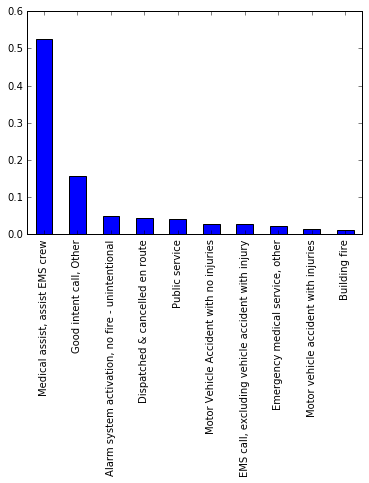

In [12]:
pd.value_counts(df['INCIDENT DESCRIPTION'], normalize=True).head(10).plot(kind='bar')

Let's group the incidents by year

In [13]:
incidents_by_year = df.groupby(df['DISPATCH DATE'].dt.year)

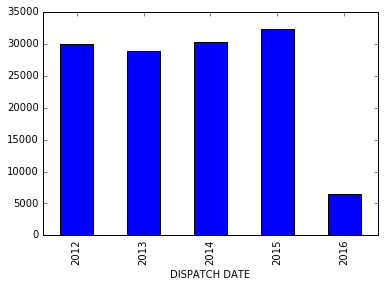

In [14]:
incidents_by_year.size().plot(kind='bar')

In [15]:
incidents_by_year.sum()

,EXPOSURE NUMBER,INCIDENT TYPE,CROSS STREET SUFFIX,PROPERTY LOSS,CONTENTS LOSS,FIRE SERVICE FATALITY,FIRE SERVICE INJURY,CIVILIAN FATALITY,CIVILIAN INJURY,PROPERTY VALUE,CONTENTS VALUE,ALARMS,SUPPRESSION APPARATUS,SUPPRESSION PERSONNEL,EMS APPARATUS,EMS PERSONNEL,RESCUE APPARATUS,RESCUE PERSONNEL,OTHER APPARATUS,OTHER PERSONNEL
DISPATCH DATE,,,,,,,,,,,,,,,,,,,,
2012,18,12771015.0,NaN,14156702,3716834,0,8,1,3,151371792,5021239,29934,13204,1605,22282,5254,949,130,10485,1732
2013,23,11970537.0,NaN,15103859,6719323,0,2,1,7,94803843,19080027,28923,10980,550,21541,3145,828,46,12057,825
2014,13,12255092.0,NaN,14843551,4452393,0,1,8,5,30286850,17097802,30348,11458,1035,22874,4239,920,52,12023,837
2015,37,13146490.0,NaN,12132481,3065428,0,1,6,10,67995052,1402502,32383,12487,924,24347,4201,1197,78,12788,871
2016,4,2595103.0,NaN,2387551,766247,0,0,2,1,4062500,1265701,6516,2451,132,4933,855,333,24,2808,215


We can then look at the frequency of incidents that occured per year

In [16]:
incidents_by_type = incidents_by_year['INCIDENT DESCRIPTION']

In [17]:
incidents_by_type.value_counts()

DISPATCH DATE  INCIDENT DESCRIPTION                              
2012           Medical assist, assist EMS crew                       14339
               Good intent call, Other                                5702
               Dispatched & cancelled en route                        1459
               Alarm system activation, no fire - unintentional       1314
               EMS call, excluding vehicle accident with injury       1166
               Public service                                          946
               EMS call, party transported by non-fire agency          807
               Motor Vehicle Accident with no injuries                 772
               Motor vehicle accident with injuries                    475
               Building fire                                           359
               False alarm or false call, Other                        278
               Passenger vehicle fire                                  235
               Smoke scare, odor o

In [18]:
incidents_by_type.value_counts(normalize=True)

DISPATCH DATE  INCIDENT DESCRIPTION                              
2012           Medical assist, assist EMS crew                       0.479085
               Good intent call, Other                               0.190511
               Dispatched & cancelled en route                       0.048747
               Alarm system activation, no fire - unintentional      0.043902
               EMS call, excluding vehicle accident with injury      0.038958
               Public service                                        0.031607
               EMS call, party transported by non-fire agency        0.026963
               Motor Vehicle Accident with no injuries               0.025794
               Motor vehicle accident with injuries                  0.015870
               Building fire                                         0.011995
               False alarm or false call, Other                      0.009288
               Passenger vehicle fire                                0.00785